# Contribution des différentes têtes

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import joblib
import seaborn as sbn

FICHIER = "./RES_429931.bin"

In [2]:
def tracer_influence_2_2(nom_fichier, REL_N, REL_D):
    nbmax = 5
    modele = joblib.load(nom_fichier)
    classes = modele.classes_.tolist()
    assert (REL_N in classes) and (REL_D in classes)
    coefs = modele.coef_
    i1, i2 = classes.index(REL_N), classes.index(REL_D)
    
    coef_d = coefs[i1, :] - coefs[i2, :]
    Csrt = np.argsort(coef_d).tolist()
    mini = coef_d[Csrt[0]]
    maxi = coef_d[Csrt[-1]]
    
    CC = coef_d.copy()
    for i in Csrt[nbmax:-nbmax]:
        CC[i] = 0.0
    
    C1, C2 = coef_d[:144].reshape(12,12), coef_d[144:].reshape(12,12)
    
    CC1 = CC[:144].reshape(12,12)
    CC2 = CC[144:].reshape(12,12)

    fig, axes = plt.subplots(1, 2,
        figsize=(16,7))
    sbn.heatmap(CC1,
                annot=C1,
                cbar=False,
                cmap="bwr",
                vmin = mini,
                vmax = maxi,
                center = 0.,
                linewidths = .5,
                linecolor="black",
                xticklabels=["H%d"%H for H in range(12)],
                yticklabels = ["L%d"%L for L in range(12)],
                ax=axes[0])
    sbn.heatmap(CC2,
                annot=C2,
                cbar=False,
                cmap="bwr",
                vmin = mini,
                vmax = maxi,
                center = 0.,
                linewidths = .5,
                linecolor="black",
                xticklabels=["H%d"%(H+1) for H in range(12)],
                yticklabels = ["L%d"%(L+1) for L in range(12)],
                ax=axes[1])
    plt.show()

In [3]:
def tracer_influence_norel(nom_fichier):
    modele = joblib.load(nom_fichier)
    classes = modele.classes_.tolist()
    coefs = modele.coef_
    norel = classes.index("<no_rel>")
    
    coef_d = coefs - (coefs[norel, :].reshape(1,288))
    Csrt = np.argsort(coef_d).tolist()
    
    CC = np.zeros(288,)
    for j in range(288):
        liste = coef_d[:,j].reshape(-1).tolist()
        if all(x >=0 for x in liste):
            print("POS : L%d H%d : "%(j//12, j%12), liste)
            CC[j] = 1.
        elif all(x <=0 for x in liste):
            print("NEG : L%d H%d : "%(j//12, j%12), liste)
            CC[j] = -1.
        else:
            CC[j] = 0.

    CC1 = CC[:144].reshape(12,12)
    CC2 = CC[144:].reshape(12,12)


    fig, axes = plt.subplots(1, 2,
        figsize=(16,7))
    sbn.heatmap(CC1,
                annot=False,
                cbar=False,
                cmap="bwr",
                vmin = -1.,
                vmax = 1.,
                center = 0.,
                linewidths = .5,
                linecolor="black",
                xticklabels=["H%d"%(H+1) for H in range(12)],
                yticklabels = ["L%d"%(L+1) for L in range(12)],
                ax=axes[0])
    sbn.heatmap(CC2,
                annot=False,
                cbar=False,
                cmap="bwr",
                vmin = -1.,
                vmax = 1.,
                center = 0.,
                linewidths = .5,
                linecolor="black",
                xticklabels=["H%d"%(H+1) for H in range(12)],
                yticklabels = ["L%d"%(L+1) for L in range(12)],
                ax=axes[1])
    plt.show()


c:\Users\fcharpentier\Miniconda3\envs\sklearn\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


NEG : L4 H3 :  [-0.29762738943099976, -0.219440758228302, -0.1738935261964798, -0.21655845642089844, -0.30253851413726807, -0.1228518858551979, -0.1003083735704422, -0.2552556097507477, -0.16169290244579315, -0.05527427792549133, -0.27295640110969543, -0.12270186841487885, -0.048011645674705505, -0.11347824335098267, -0.19574882090091705, -0.05519367754459381, 0.0, -0.16489434242248535]
NEG : L6 H1 :  [-0.16448542475700378, -0.15317365527153015, -0.18239910900592804, -0.07779397070407867, -0.08352649211883545, -0.16128957271575928, -0.021852321922779083, -0.1325674206018448, -0.22801204025745392, -0.06326580047607422, -0.09996044635772705, -0.07864958047866821, -0.11013824492692947, -0.060164518654346466, -0.16207312047481537, -0.0964856818318367, 0.0, -0.1421983242034912]
POS : L8 H5 :  [0.1425400674343109, 0.1404506266117096, 0.08255893737077713, 0.12262696027755737, 0.11310772597789764, 0.13678638637065887, 0.0033527612686157227, 0.10413342714309692, 0.0831146091222763, 0.0478211231

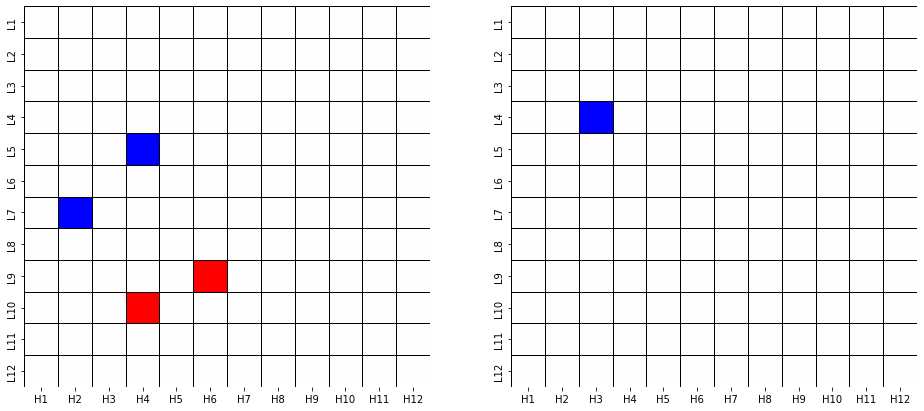

In [4]:
tracer_influence_norel(FICHIER)

In [5]:
def comptage_topk(nom_fichier, k, imgFile = None):
    modele = joblib.load(nom_fichier)
    classes = modele.classes_.tolist()
    coefs = modele.coef_
    nb_classes = len(classes)
    cpt = [0] * 24
    for i1, R1 in enumerate(classes):
        for i2 in range(i1+1, nb_classes):
            R2 = classes[i2]
            coef_d = coefs[i1, :] - coefs[i2, :]
            Csrt = np.argsort(coef_d).tolist()
            for L in Csrt[:k]:
                L = L // 12 # déterminons le numéro de la couche
                cpt[L] += 1
            for L in Csrt[-k:]:
                L = L // 12 # déterminons le numéro de la couche
                cpt[L] += 1
    fig, axes = plt.subplots(1,2, figsize=(9,3))
    somme = sum(cpt)
    maxi = max(x/somme for x in cpt)
    axes[0].set_ylim((0,1.05*maxi))
    axes[1].set_ylim((0,1.05*maxi))
    axes[0].bar([x for x in range(12)], np.array(cpt[:12])/somme, tick_label=["L%d"%nn for nn in range(1,13)])
    axes[0].set_ylabel("k = %d"%k)
    axes[0].set_xlabel("Source → Target")
    axes[1].bar([x for x in range(12)], np.array(cpt[12:])/somme, tick_label=["L%d"%nn for nn in range(1,13)])
    axes[1].set_xlabel("Target → Source")
    if imgFile != None:
        fig.savefig(imgFile)
    plt.show()

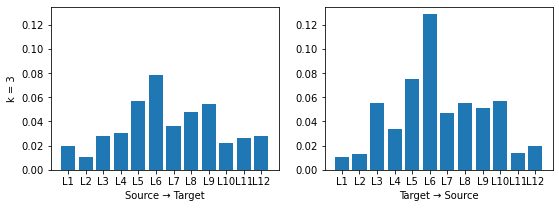

In [6]:
comptage_topk(FICHIER, 3, imgFile = "top3.eps")

In [7]:
def comptage_jusque_k(nom_fichier, liste_k):
    if len(liste_k) == 1:
        comptage_topk(nom_fichier, 1)
    else:
        modele = joblib.load(nom_fichier)
        classes = modele.classes_.tolist()
        coefs = modele.coef_
        nb_classes = len(classes)
        
        fig, axes = plt.subplots(len(liste_k),2, figsize=(10,3*len(liste_k)))
        for k, nk in enumerate(liste_k):
            cpt = [0] * 24
            for i1, R1 in enumerate(classes):
                for i2 in range(i1+1, nb_classes):
                    R2 = classes[i2]
                    coef_d = coefs[i1, :] - coefs[i2, :]
                    Csrt = np.argsort(coef_d).tolist()
                    for L in Csrt[:nk]:
                        L = L // 12 # déterminons le numéro de la couche
                        cpt[L] += 1
                    for L in Csrt[-nk:]:
                        L = L // 12 # déterminons le numéro de la couche
                        cpt[L] += 1
            somme = sum(cpt)
            maxi = max(x/somme for x in cpt)
            
            axes[k, 0].set_ylim((0, 1.05*maxi))
            axes[k, 1].set_ylim((0, 1.05*maxi))
            axes[k, 0].bar([x for x in range(12)], np.array(cpt[:12])/somme, tick_label=["L%d"%nn for nn in range(1,13)])
            axes[k, 0].set_ylabel("k = %d"%nk)
            axes[k, 1].bar([x for x in range(12)], np.array(cpt[12:])/somme, tick_label=["L%d"%nn for nn in range(1,13)])
        axes[len(liste_k)-1, 0].set_xlabel("Source → Target")
        axes[len(liste_k)-1, 1].set_xlabel("Target → Source")
        plt.show()

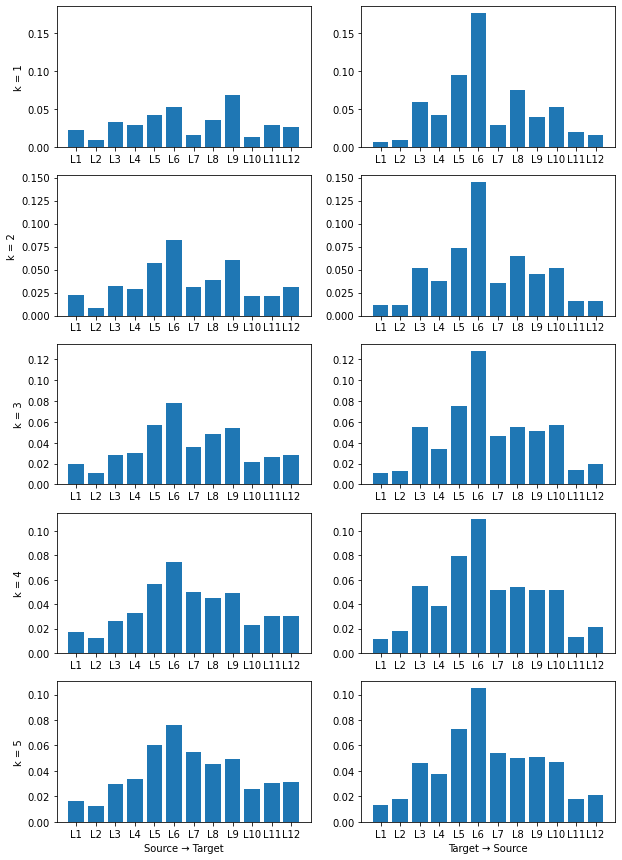

In [8]:
comptage_jusque_k(FICHIER, [1,2,3,4,5])